 # Problem 1: Linear regression
 ## 1. Print the shapes of these four objects.

In [26]:
import numpy as np
import matplotlib.pyplot as pt
import mltools as ml


data = np.genfromtxt("data/curve80.txt")
X = data[:, 0]
X = np.atleast_2d(X).T
Y = data[:, 1]
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)

print("Xtr Shape: ", Xtr.shape)
print("Xte Shape: ", Xte.shape)
print("Ytr Shape: ", Ytr.shape)
print("Yte Shape: ", Yte.shape)


Xtr Shape:  (60, 1)
Xte Shape:  (20, 1)
Ytr Shape:  (60,)
Yte Shape:  (20,)


 ## 2. Creating a linear regression predictor
 ### a) Creating a linear regression predictor

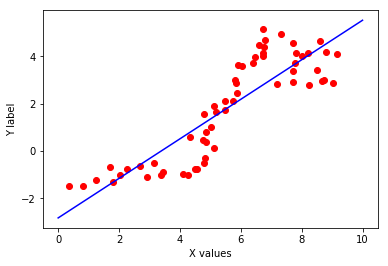

In [27]:
lr = ml.linear.linearRegress(Xtr, Ytr)
xs = np.linspace(0, 10, 200)
xs = xs[:, np.newaxis]
ys = lr.predict(xs)

pt.scatter(Xtr, Ytr, color="red", label="Training")
pt.plot(xs, ys, color="blue", label="Prediction function")
pt.xlabel("X values")
pt.ylabel("Y label")
pt.show()


 ### b) Linear Regression co-efficients.

In [28]:
print(lr.theta)

print("Co-efficients obtained from the predicted values:")
print(ys[0], (ys[199]-ys[0])/(xs[199]-xs[0]))


[[-2.82765049  0.83606916]]
Co-efficients obtained from the predicted values:
[-2.82765049] [0.83606916]


 From above it is clear that the regression co-efficients match our plot.
 ### c) MSE for the predictions.

In [29]:


def mse(X, Y, lr):
    Yh = lr.predict(X)
    Ys = np.atleast_2d(Y).T
    e = Ys - Yh
    mse = e.T.dot(e) / X.shape[0]
    return np.squeeze(mse)


print('MSE on Training Data')
print(mse(Xtr, Ytr, lr))
print('MSE on Test Data')
print(mse(Xte, Yte, lr))


MSE on Training Data
1.127711955609391
MSE on Test Data
2.2423492030101246


 ## 3. Fitting y = f(x) using a polynomial function f(x) of increasing order.
 ###  a) Plot their learned prediction functions f(x)

In [30]:

Xtr2 = np.zeros((Xtr.shape[0], 2))
Xtr2[:, 0] = Xtr[:, 0]
Xtr2[:, 1] = Xtr[:, 0]**2

lr = ml.linear.linearRegress(Xtr2, Ytr)
xs = np.linspace(0, 10, 200)
xs = xs[:, np.newaxis]


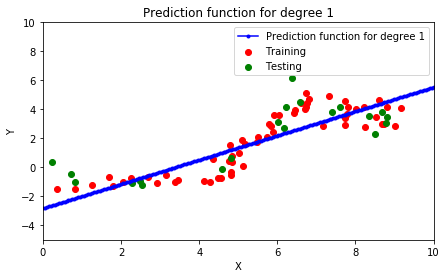

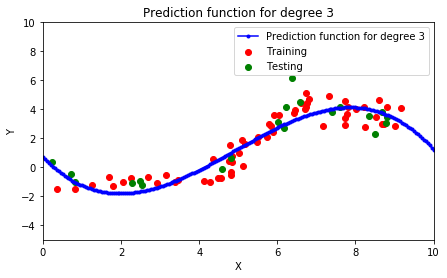

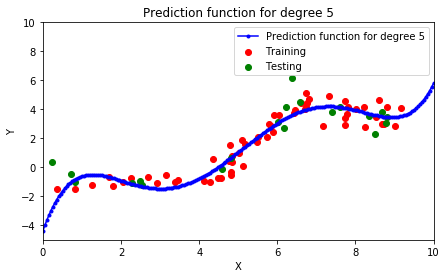

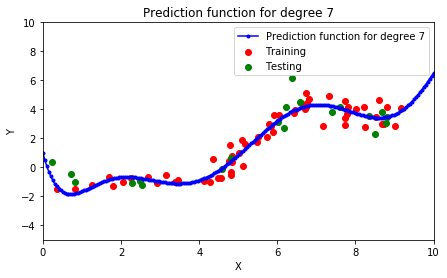

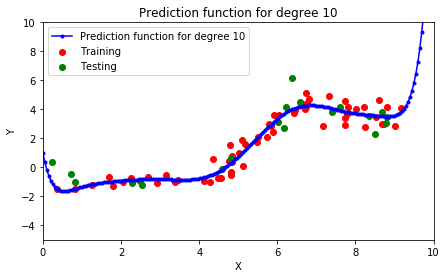

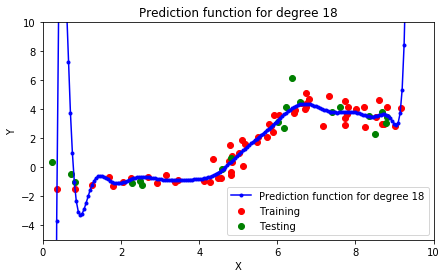

In [41]:


def Phi(X, degree, params):
    return ml.transforms.rescale(ml.transforms.fpoly(X, degree, False), params)[0]


degrees = [1, 3, 5, 7, 10, 18]
errTrain = [0] * len(degrees)
errTest = [0] * len(degrees)

for index, degree in enumerate(degrees):
    XtrP = ml.transforms.fpoly(Xtr, degree, False)
    XtrP, params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP = Phi(Xte, degree, params)
    xsP = Phi(xs, degree, params)
    YsHat = lr.predict(xsP)
    _fig, plot = pt.subplots(1, 1, figsize=(7, 4))
    plot.set_xlabel("X")
    plot.set_ylabel("Y")
    plot.scatter(Xtr, Ytr, color="red", label="Training")
    plot.scatter(Xte, Yte, color="green", label="Testing")
    plot.plot(
        xs, YsHat, color="blue",
        label="Prediction function for degree {}".format(degree),
        marker="."
    )
    plot.set_xlim(0, 10)
    plot.set_ylim(-5, 10)
    plot.set_title("Prediction function for degree {}".format(degree))
    plot.legend()
    errTrain[index] = mse(XtrP, Ytr, lr)
    errTest[index] = mse(XteP, Yte, lr)

pt.show()


 ###  b) Plot their training and test errors on a log scale

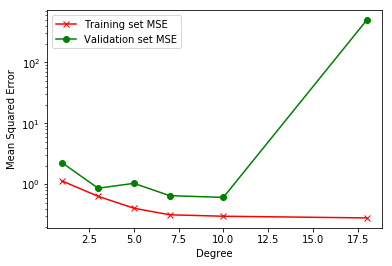

In [32]:
pt.ylabel("Mean Squared Error")
pt.xlabel("Degree")
pt.semilogy(
    degrees, errTrain, 'red', marker='x',
    label='Training set MSE'
)
pt.semilogy(
    degrees, errTest, 'green', marker='o',
    label='Validation set MSE'
)
pt.legend()
pt.show()


 ### c) A ploynomial of degree 10 is ideal looking at the graph above. MSE for test data is minimal when degree = 10.
 # Problem 2: Cross-validation
 ### 1) Plot the five-fold cross-validation error and test error.

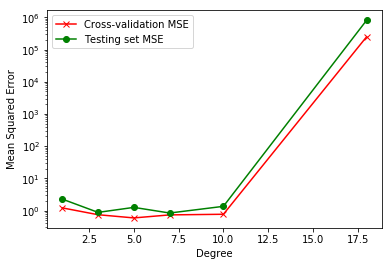

In [33]:
errCross = [0] * len(degrees)
errTest = [0] * len(degrees)
nFold = 5
for index, degree in enumerate(degrees):
    errorCrossValidation = [0] * nFold
    errCrossValidationTesting = [0] * nFold
    for iFold in range(nFold):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFold, iFold)
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP, params = ml.transforms.rescale(XtiP)
        XviP = Phi(Xvi, degree, params)
        XteP = Phi(Xte, degree, params)
        lr = ml.linear.linearRegress(XtiP, Yti)
        errorCrossValidation[iFold] = mse(XviP, Yvi, lr)
        errCrossValidationTesting[iFold] = mse(XteP, Yte, lr)
    errCross[index] = np.mean(errorCrossValidation)
    errTest[index] = np.mean(errCrossValidationTesting)

pt.ylabel("Mean Squared Error")
pt.xlabel("Degree")
pt.semilogy(
    degrees, errCross, 'red', marker='x',
    label='Cross-validation MSE'
)
pt.semilogy(
    degrees, errTest, 'green', marker='o',
    label='Testing set MSE'
)
pt.legend()
pt.show()

 ### 2) How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the actual test data
 For smaller degrees, MSE from both tends to remain approximately the same. But as the degree increases, MSE from the 5-fold validation seems to be much higher than the MSE on the actual test data.
 Hence, on higher degrees MSE on the actual test data might be much different than the MSE calculated using 5-fold validation making it less reliable.
 ### 3) Which polynomial degree do you recommend based on five-fold cross-validation error?
 Based on the graph above, it is clear that MSE on the validation set is minimum when degree is 5. Hence degree=5 would be the recommended value when a 5-fold cross-validation is used.
 ### 4) For the degree that you picked in step 3, plot the cross-validation error as the number of folds is varied.

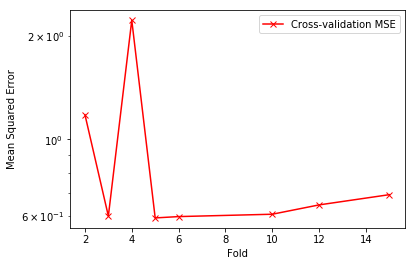

In [34]:
nFolds = [2, 3, 4, 5, 6, 10, 12, 15]
degree = 5
errCross = [0] * len(nFolds)
for index, nFold in enumerate(nFolds):
    errorCrossValidation = [0] * nFold
    for iFold in range(nFold):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFold, iFold)
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP, params = ml.transforms.rescale(XtiP)
        XviP = Phi(Xvi, degree, params)
        lr = ml.linear.linearRegress(XtiP, Yti)
        errorCrossValidation[iFold] = mse(XviP, Yvi, lr)
    errCross[index] = np.mean(errorCrossValidation)

pt.ylabel("Mean Squared Error")
pt.xlabel("Fold")
pt.semilogy(
    nFolds, errCross, 'red', marker='x',
    label='Cross-validation MSE'
)
pt.legend()
pt.show()

 From the above graph, it is clear that when the fold=2 or 4, MSE is extremely high. But when fold=3, the MSE is low. This can be attributed to the inherent bias in the given data. For lower folds, this bias is aggravated as biased data fall in the same folds. For example, we can assume that similar data is being regarded under the same fold when fold=2/4, but split into different folds when fold=3. This can be avoided by increasing the fold until we remove the bias. But, since we are using Leave-One-Out-Cross-Validation, increasing the fold also means that we increase the training data. This might result in a slightly higher MSE for the small validation data set. Looking at the graph, it is clear that fold=5 gives us the perfect balance where we remove the bias and still maintain the low MSE. However, if we want to ensure the removal of bias we could increase our fold value since the MSE grows very slowly with the number of folds.
 # Statement of collaboration
 I have not collaborated with anyone for this homework and have maintained the UCI code of honesty.